In [1]:
import glob
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import pearsonr
import statistics

In [3]:
satellite_6_TP1=pd.read_csv("SatelliteImage_6bands_TP3.csv")
satellite_3_TP1=pd.read_csv("RGBvalues_satellite_TP3_afteroutliers.csv")
rgb_3_TP1=pd.read_csv("RGBuav_TP3.csv")

In [29]:
rgb_3_TP1

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,CrawfordsvilleV2-TP3-4351_10_13,57.964713,54.0,15020628,79.781619,79.0,20674130,50.926200,48.0,13196710,0.198887,0.200000,51538.485827,0.164056,0.173913,42512.364613
1,CrawfordsvilleV2-TP3-4351_10_14,36.736213,34.0,9505091,57.025644,54.0,14754758,33.825438,30.0,8751960,0.234064,0.236364,60561.580261,0.210023,0.218750,54341.237190
2,CrawfordsvilleV2-TP3-4351_10_15,57.649911,56.0,14915358,79.744248,81.0,20631671,53.394936,53.0,13814498,0.187232,0.188406,48441.194824,0.162981,0.173554,42166.887772
3,CrawfordsvilleV2-TP3-4351_10_16,48.344454,44.0,12520295,67.614562,63.0,17510887,44.641703,40.0,11561353,0.191540,0.191111,49605.131422,0.166271,0.175879,43061.092849
4,CrawfordsvilleV2-TP3-4351_10_17,49.980595,45.0,12945474,70.062013,66.0,18146762,45.214096,40.0,11710903,0.194008,0.192727,50249.990600,0.162085,0.170732,41981.509663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,CrawfordsvilleV2-TP3-4353_9_42,84.245575,81.0,21627524,109.571588,115.0,28129218,72.015655,73.0,18487859,0.174035,0.176471,44678.362612,0.133235,0.140625,34204.042500
510,CrawfordsvilleV2-TP3-4353_9_43,85.275734,86.0,21877319,112.465488,119.0,28852796,75.125158,78.0,19273209,0.171284,0.174242,43942.642235,0.134742,0.146919,34567.683536
511,CrawfordsvilleV2-TP3-4353_9_44,81.840900,82.0,21013715,108.268267,113.0,27799285,69.630768,71.0,17878605,0.182898,0.181435,46961.367604,0.138344,0.146154,35521.567272
512,CrawfordsvilleV2-TP3-4353_9_45,82.648165,82.0,21180328,110.591483,116.0,28341390,68.682691,69.0,17601382,0.195398,0.194969,50074.926651,0.142136,0.156250,36425.377128


In [17]:
# plt.scatter(satellite_6_TP1['Red_mean'], satellite_3_TP1['Red_mean'])

In [30]:
rgb_3_TP1['file_'] = rgb_3_TP1['file_'].str.replace('V2', '')

In [31]:
concatenated_df = pd.merge(satellite_6_TP1, satellite_3_TP1, on='file_', how='outer')
# concatenated_df.rename(columns={concatenated_df.columns[3]:"UAVVI"}, inplace=True)

In [32]:
concatenated_df = pd.merge(rgb_3_TP1,concatenated_df, on='file_', how='outer')

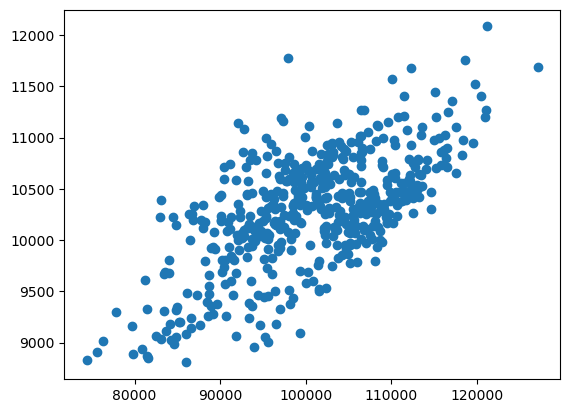

In [33]:
plt.scatter(concatenated_df['Red_sum_x'], concatenated_df['Red_sum_y'])

In [34]:
rgb_3_TP1

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,Crawfordsville-TP3-4351_10_13,57.964713,54.0,15020628,79.781619,79.0,20674130,50.926200,48.0,13196710,0.198887,0.200000,51538.485827,0.164056,0.173913,42512.364613
1,Crawfordsville-TP3-4351_10_14,36.736213,34.0,9505091,57.025644,54.0,14754758,33.825438,30.0,8751960,0.234064,0.236364,60561.580261,0.210023,0.218750,54341.237190
2,Crawfordsville-TP3-4351_10_15,57.649911,56.0,14915358,79.744248,81.0,20631671,53.394936,53.0,13814498,0.187232,0.188406,48441.194824,0.162981,0.173554,42166.887772
3,Crawfordsville-TP3-4351_10_16,48.344454,44.0,12520295,67.614562,63.0,17510887,44.641703,40.0,11561353,0.191540,0.191111,49605.131422,0.166271,0.175879,43061.092849
4,Crawfordsville-TP3-4351_10_17,49.980595,45.0,12945474,70.062013,66.0,18146762,45.214096,40.0,11710903,0.194008,0.192727,50249.990600,0.162085,0.170732,41981.509663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Crawfordsville-TP3-4353_9_42,84.245575,81.0,21627524,109.571588,115.0,28129218,72.015655,73.0,18487859,0.174035,0.176471,44678.362612,0.133235,0.140625,34204.042500
510,Crawfordsville-TP3-4353_9_43,85.275734,86.0,21877319,112.465488,119.0,28852796,75.125158,78.0,19273209,0.171284,0.174242,43942.642235,0.134742,0.146919,34567.683536
511,Crawfordsville-TP3-4353_9_44,81.840900,82.0,21013715,108.268267,113.0,27799285,69.630768,71.0,17878605,0.182898,0.181435,46961.367604,0.138344,0.146154,35521.567272
512,Crawfordsville-TP3-4353_9_45,82.648165,82.0,21180328,110.591483,116.0,28341390,68.682691,69.0,17601382,0.195398,0.194969,50074.926651,0.142136,0.156250,36425.377128


In [35]:
concatenated_df.columns

Index(['file_', 'Red_mean', 'Red_median', 'Red_sum', 'Green_mean',
       'Green_median', 'Green_sum', 'Blue_mean', 'Blue_median', 'Blue_sum',
       'GLI_mean', 'GLI_median', 'GLI_sum', 'NGRDI_mean', 'NGRDI_median',
       'NGRDI_sum', 'Red_mean_x', 'Red_median_x', 'Red_sum_x', 'Green_mean_x',
       'Green_median_x', 'Green_sum_x', 'Blue_mean_x', 'Blue_median_x',
       'Blue_sum_x', 'GLI_mean_x', 'GLI_median_x', 'GLI_sum_x', 'NGRDI_mean_x',
       'NGRDI_median_x', 'NGRDI_sum_x', 'NDVI_mean', 'NDVI_median', 'NDVI_sum',
       'NDRE_mean', 'NDRE_median', 'NDRE_sum', 'RedEdge_mean',
       'RedEdge_median', 'RedEdge_sum', 'DeepBlue_mean', 'DeepBlue_median',
       'DeepBlue_sum', 'Red_mean_y', 'Red_median_y', 'Red_sum_y',
       'Green_mean_y', 'Green_median_y', 'Green_sum_y', 'Blue_mean_y',
       'Blue_median_y', 'Blue_sum_y', 'GLI_mean_y', 'GLI_median_y',
       'GLI_sum_y', 'NGRDI_mean_y', 'NGRDI_median_y', 'NGRDI_sum_y'],
      dtype='object')

In [36]:
# concatenated_df=concatenated_df.loc[concatenated_df['Red_mean_x']<=500] 

In [37]:
concatenated_df=concatenated_df.dropna()

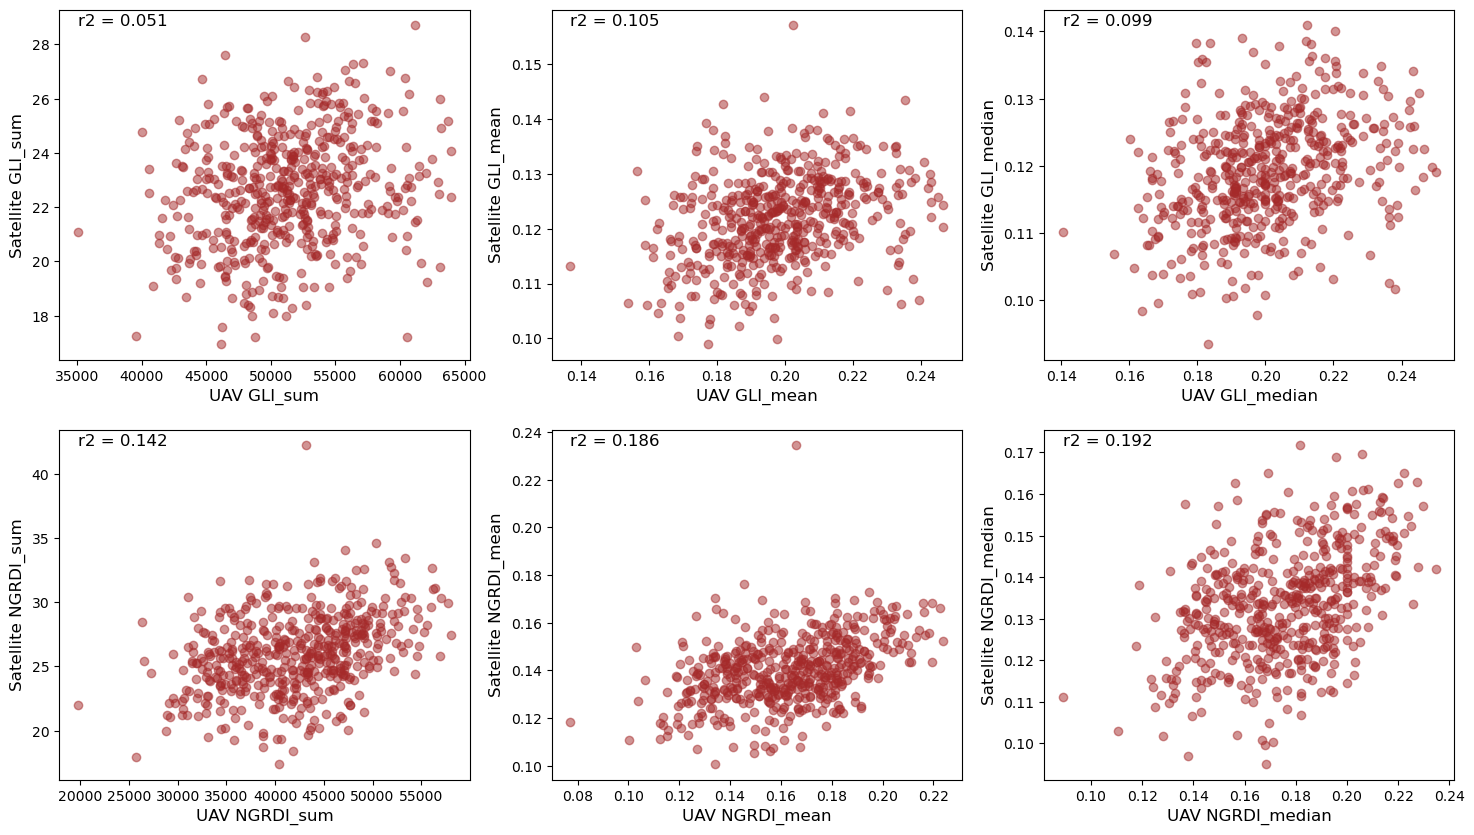

In [38]:
fig = plt.figure(figsize=(18,10))

#GLIsum
myax=fig.add_subplot(2,3,1)
myax.scatter(concatenated_df['GLI_sum'], concatenated_df['GLI_sum_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_sum'].tolist(),concatenated_df['GLI_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_sum']), max(concatenated_df['GLI_sum_x'])), size=12)
myax.set_ylabel("Satellite GLI_sum",fontsize=12)
myax.set_xlabel("UAV GLI_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,2)
myax.scatter(concatenated_df['GLI_mean'], concatenated_df['GLI_mean_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_mean'].tolist(),concatenated_df['GLI_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_mean']), max(concatenated_df['GLI_mean_x'])), size=12)
myax.set_ylabel("Satellite GLI_mean",fontsize=12)
myax.set_xlabel("UAV GLI_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,3)
myax.scatter(concatenated_df['GLI_median'], concatenated_df['GLI_median_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_median'].tolist(),concatenated_df['GLI_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_median']), max(concatenated_df['GLI_median_x'])), size=12)
myax.set_ylabel("Satellite GLI_median",fontsize=12)
myax.set_xlabel("UAV GLI_median", fontsize=12)

#GLIsum
myax=fig.add_subplot(2,3,4)
myax.scatter(concatenated_df['NGRDI_sum'], concatenated_df['NGRDI_sum_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_sum'].tolist(),concatenated_df['NGRDI_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_sum']), max(concatenated_df['NGRDI_sum_x'])), size=12)
myax.set_ylabel("Satellite NGRDI_sum",fontsize=12)
myax.set_xlabel("UAV NGRDI_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,5)
myax.scatter(concatenated_df['NGRDI_mean'], concatenated_df['NGRDI_mean_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_mean'].tolist(),concatenated_df['NGRDI_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_mean']), max(concatenated_df['NGRDI_mean_x'])), size=12)
myax.set_ylabel("Satellite NGRDI_mean",fontsize=12)
myax.set_xlabel("UAV NGRDI_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,6)
myax.scatter(concatenated_df['NGRDI_median'], concatenated_df['NGRDI_median_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_median'].tolist(),concatenated_df['NGRDI_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_median']), max(concatenated_df['NGRDI_median_x'])), size=12)
myax.set_ylabel("Satellite NGRDI_median",fontsize=12)
myax.set_xlabel("UAV NGRDI_median", fontsize=12)


plt.savefig("VIs_TP3.png")

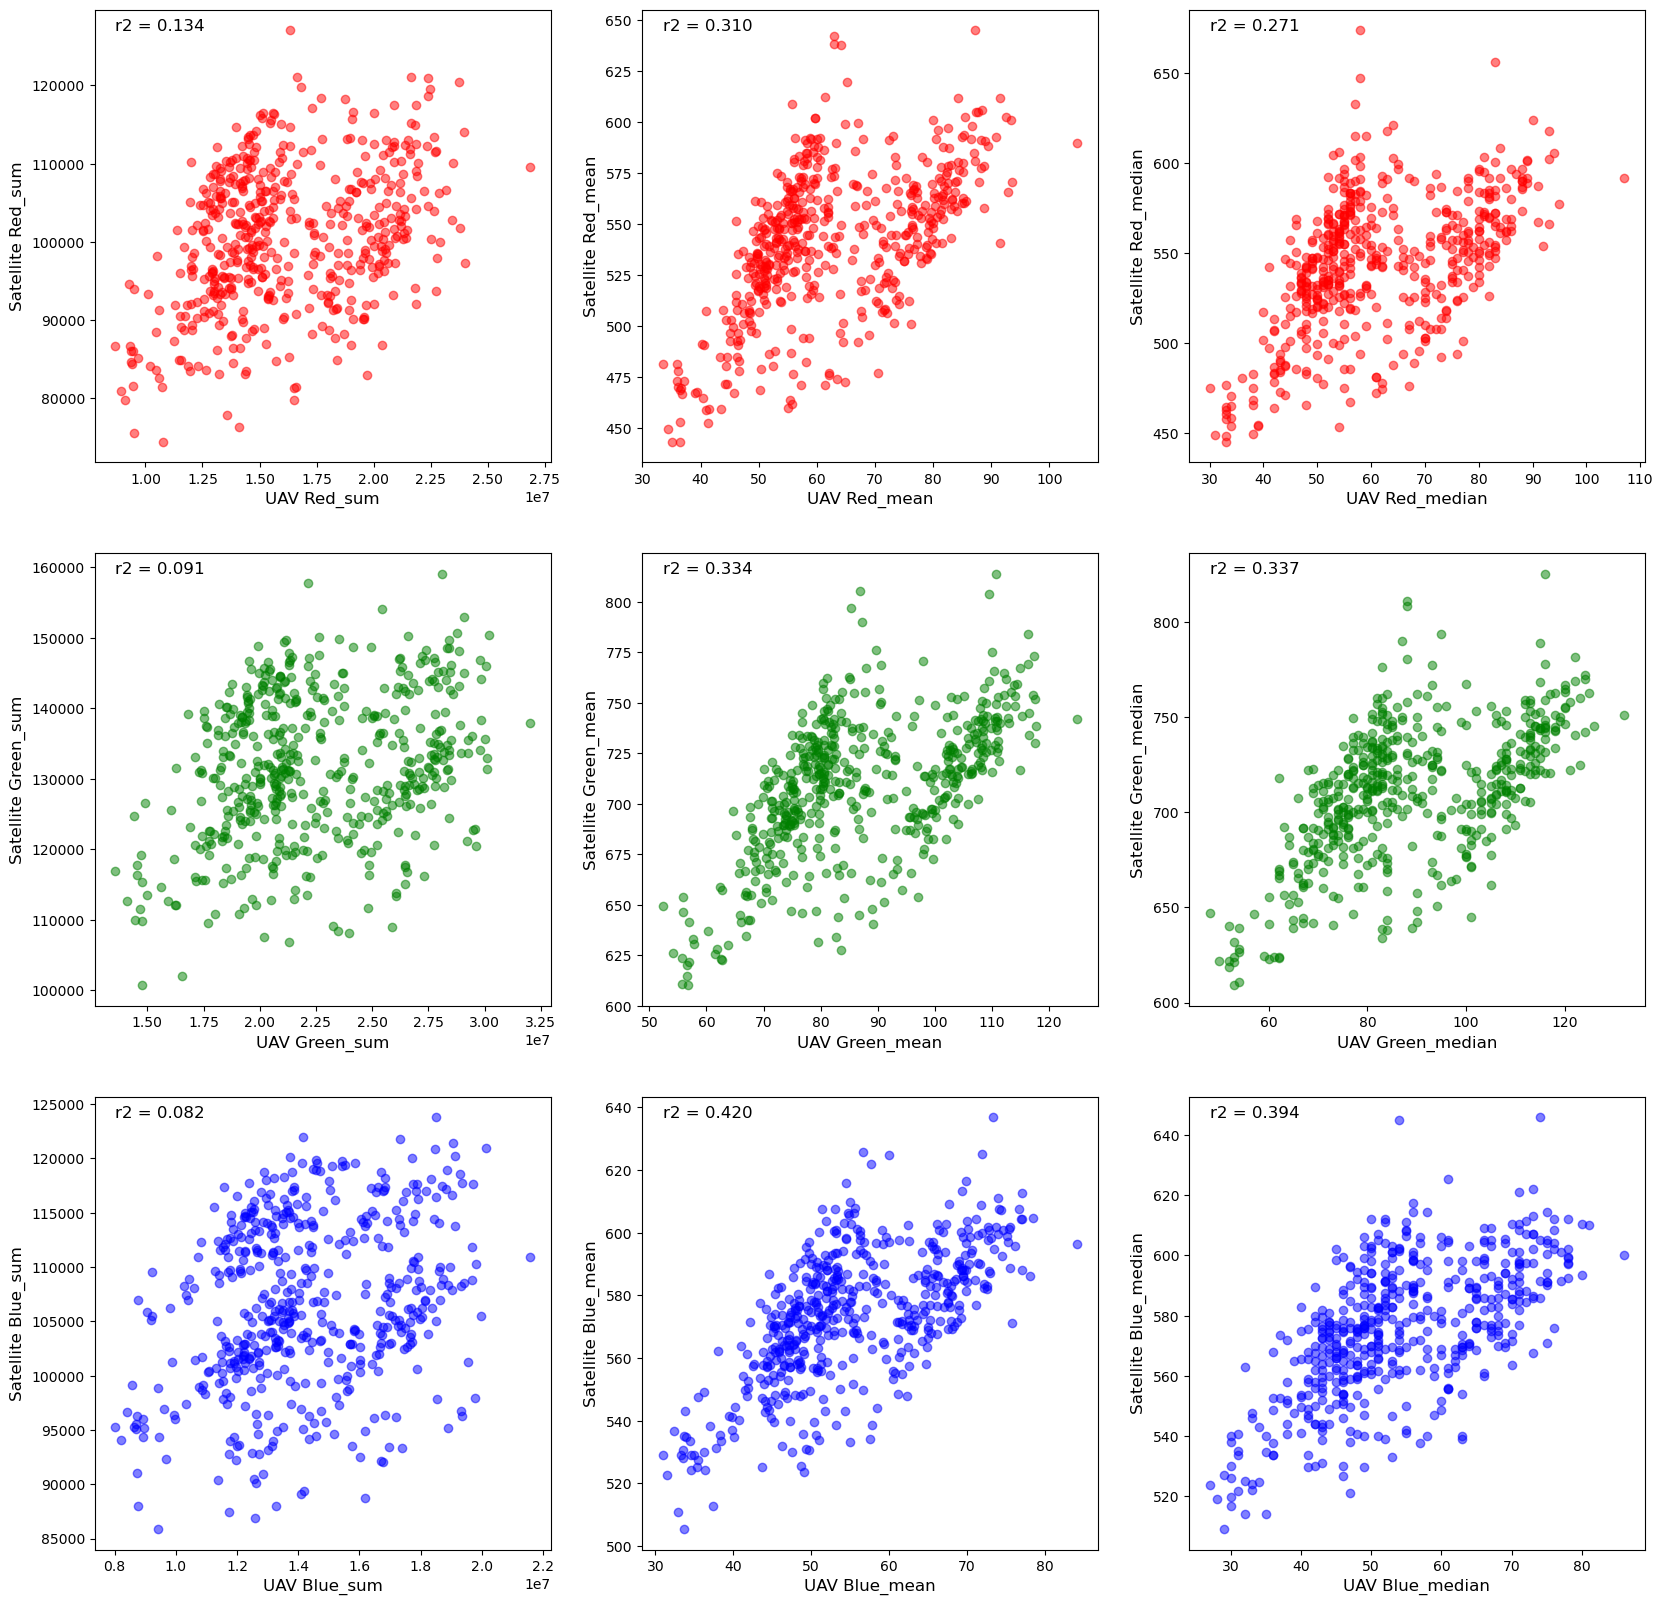

In [39]:
fig = plt.figure(figsize=(20,20))

#GLIsum
myax=fig.add_subplot(3,3,1)
myax.scatter(concatenated_df['Red_sum'], concatenated_df['Red_sum_x'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_sum'].tolist(),concatenated_df['Red_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_sum']), max(concatenated_df['Red_sum_x'])), size=12)
myax.set_ylabel("Satellite Red_sum",fontsize=12)
myax.set_xlabel("UAV Red_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,2)
myax.scatter(concatenated_df['Red_mean'], concatenated_df['Red_mean_x'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_mean'].tolist(),concatenated_df['Red_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_mean']), max(concatenated_df['Red_mean_x'])), size=12)
myax.set_ylabel("Satellite Red_mean",fontsize=12)
myax.set_xlabel("UAV Red_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,3)
myax.scatter(concatenated_df['Red_median'], concatenated_df['Red_median_x'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_median'].tolist(),concatenated_df['Red_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_median']), max(concatenated_df['Red_median_x'])), size=12)
myax.set_ylabel("Satellite Red_median",fontsize=12)
myax.set_xlabel("UAV Red_median", fontsize=12)

#GLIsum
myax=fig.add_subplot(3,3,4)
myax.scatter(concatenated_df['Green_sum'], concatenated_df['Green_sum_x'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_sum'].tolist(),concatenated_df['Green_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_sum']), max(concatenated_df['Green_sum_x'])), size=12)
myax.set_ylabel("Satellite Green_sum",fontsize=12)
myax.set_xlabel("UAV Green_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,5)
myax.scatter(concatenated_df['Green_mean'], concatenated_df['Green_mean_x'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_mean'].tolist(),concatenated_df['Green_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_mean']), max(concatenated_df['Green_mean_x'])), size=12)
myax.set_ylabel("Satellite Green_mean",fontsize=12)
myax.set_xlabel("UAV Green_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,6)
myax.scatter(concatenated_df['Green_median'], concatenated_df['Green_median_x'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_median'].tolist(),concatenated_df['Green_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_median']), max(concatenated_df['Green_median_x'])), size=12)
myax.set_ylabel("Satellite Green_median",fontsize=12)
myax.set_xlabel("UAV Green_median", fontsize=12)


#GLIsum
myax=fig.add_subplot(3,3,7)
myax.scatter(concatenated_df['Blue_sum'], concatenated_df['Blue_sum_x'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_sum'].tolist(),concatenated_df['Blue_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_sum']), max(concatenated_df['Blue_sum_x'])), size=12)
myax.set_ylabel("Satellite Blue_sum",fontsize=12)
myax.set_xlabel("UAV Blue_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,8)
myax.scatter(concatenated_df['Blue_mean'], concatenated_df['Blue_mean_x'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_mean'].tolist(),concatenated_df['Blue_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_mean']), max(concatenated_df['Blue_mean_x'])), size=12)
myax.set_ylabel("Satellite Blue_mean",fontsize=12)
myax.set_xlabel("UAV Blue_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,9)
myax.scatter(concatenated_df['Blue_median'], concatenated_df['Blue_median_x'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_median'].tolist(),concatenated_df['Blue_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_median']), max(concatenated_df['Blue_median_x'])), size=12)
myax.set_ylabel("Satellite Blue_median",fontsize=12)
myax.set_xlabel("UAV Blue_median", fontsize=12)


plt.savefig("ColorChannels_TP3.png")

In [35]:
# plt.scatter(concatenated_df['NGRDI_sum_x'], concatenated_df['NGRDI_sum'])